In [4]:
# pip3 install tqdm, tensorflow, numpy, matplotlib, pandas

import os
import csv
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# c:\Users\UserK\Desktop\hansol_J\jiwon_work\fourth\..
sys.path.append(os.path.join(os.getcwd(), os.path.pardir))
from get_tensor_through_imgs_fn import get_tensor_through_imgs_fn

c:\Users\UserK\Desktop\hansol_J\jiwon_work\fourth\..


  0%|          | 0/792 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 2/792 [00:00<01:04, 12.20it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 792/792 [00:16<00:00, 48.52it/s]


normalized_test_image_tensor.shape : (792, 224, 224, 3)
25/25 [==============================] - 43s 2s/step
predicted_y.shape : (792, 19)
predicted_labels : ['오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '오타공', '

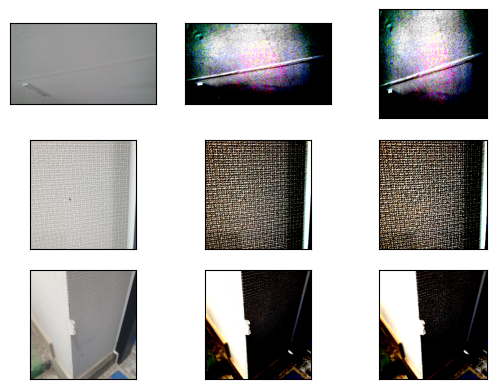

In [15]:
# ========= 테스트 파일로 추론해보기 =========

# ImageDataGenerator() 옵션 변경

# 데이콘 리더 보드 점수
# 20회 학습 진행 시 모든 테스트 사진에 대하여 오타공으로 판단하여 제출하지 않음
# 5회 학습 진행 시 => 0.0887985251

RESIZED_WIDTH = 224
RESIZED_HEIGHT = 224
MODEL_FILE_NAME = 'model_20230430_142111.h5'

# 추후에 라벨이 추가될 경우 등 확장성 및 모델의 안정성을 고려하여 총 19가지의 하자 유형의 순서가 변경되지 않도록 직접적으로 리스트 생성
DEFECT_TYPE_NAMES = ["가구수정", "걸레받이수정", "곰팡이", "꼬임", "녹오염", "들뜸", "면불량", "몰딩수정", "반점", "석고수정",
                     "오염", "오타공", "울음", "이음부불량", "창틀,문틀수정", "터짐", "틈새과다", "피스", "훼손"]

TEST_FOLDER_PATH = os.path.join(os.getcwd(), os.pardir, os.pardir, 'open', 'test')

test_img_paths = []
test_img_names = os.listdir(TEST_FOLDER_PATH)

for img_name in tqdm(test_img_names):

    img_path = os.path.join(TEST_FOLDER_PATH, img_name)
    test_img_paths.append(img_path)

# print('test_img_paths :', test_img_paths)

fig = plt.figure()

# 792개의 이미지 데이터
test_image_tensor = get_tensor_through_imgs_fn(test_img_paths, RESIZED_HEIGHT, RESIZED_WIDTH, fig)
normalized_test_image_tensor = test_image_tensor / 255
print('normalized_test_image_tensor.shape :',
      normalized_test_image_tensor.shape)

model = load_model(MODEL_FILE_NAME)

predicted_y = model.predict(normalized_test_image_tensor)
print('predicted_y.shape :', predicted_y.shape)

predicted_index_list = np.argmax(predicted_y, axis=1)
# print('predicted_index_list :', predicted_index_list)

predicted_labels = []

for index in predicted_index_list:
    predicted_labels.append(DEFECT_TYPE_NAMES[index])

print('predicted_labels :', predicted_labels)

# 연월일_시간
now = datetime.today().strftime('%Y%m%d_%H%M%S')
predicted_csv = open(f'test_{now}.csv', 'w', newline='', encoding='utf-8')
wr = csv.writer(predicted_csv)
wr.writerow(['id', 'label'])

ids = []
predicted_label_count = len(predicted_labels)

for index in range(predicted_label_count):
    ids.append(f'TEST_{str(index).zfill(3)}')

# [ 'TEST_000', ... ]
# print('ids :', ids)

wr.writerows([*zip(ids, predicted_labels)])
predicted_csv.flush()
predicted_csv.close()

# ===========================================

In [16]:
# model = load_model(MODEL_FILE_NAME, custom_objects= {'DropConnect': DropConnect})

In [17]:
# 오타공으로 추론한 확률
for probability in range(len(predicted_y)):
    print(predicted_y[probability][11])

0.9071972
0.9344986
0.92425257
0.9422526
0.9765856
0.9644844
0.93625206
0.88604134
0.91503966
0.69770306
0.9407222
0.9577192
0.9495728
0.9569049
0.83398104
0.97176826
0.90267915
0.95366424
0.961368
0.9828137
0.7051649
0.93279016
0.72181696
0.92383546
0.89821887
0.9308805
0.9528242
0.9324732
0.8940141
0.907582
0.9794102
0.9414527
0.92957824
0.9437116
0.9420813
0.6873618
0.901263
0.9349078
0.92122436
0.8600471
0.9601522
0.9173406
0.9338925
0.9170958
0.9563078
0.90539074
0.92360693
0.9447381
0.9567574
0.95809704
0.9044835
0.8464054
0.93748915
0.94497114
0.984072
0.9835543
0.9057313
0.94051075
0.9752372
0.90584874
0.88273305
0.5459673
0.8366433
0.9220674
0.915276
0.931356
0.9841675
0.94489235
0.84659487
0.9534995
0.9314863
0.916082
0.96048415
0.98027426
0.9057738
0.8684101
0.94523704
0.94331086
0.96623427
0.91733944
0.9113062
0.9269715
0.9369754
0.9455803
0.95485276
0.9517632
0.924259
0.9093825
0.9081678
0.9522967
0.8935777
0.89015424
0.9558672
0.97348976
0.89196974
0.9374636
0.9191497
0.9